In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as mst
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

import seaborn as sns
mst.use('ggplot')
sns.set_style('whitegrid')

# Метрики регрессии

In [22]:
colors = ['maroon','red','orange','green','blue']

In [54]:
y = pd.Series(data=[5,6, 8,9, 27])

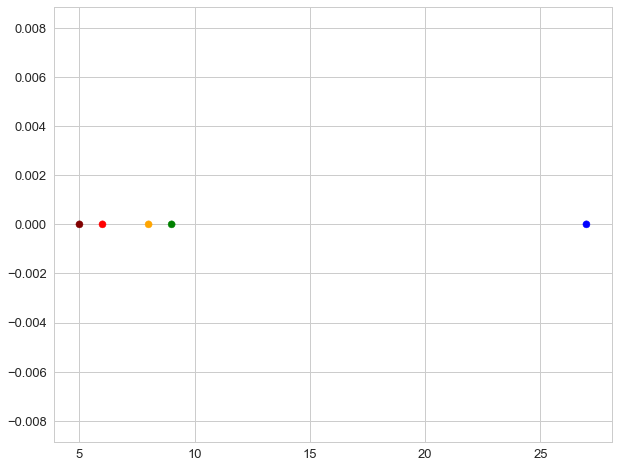

In [55]:
plt.scatter(y, np.zeros_like(y), c=colors);

## MSE

In [70]:
from sklearn.metrics import mean_squared_error

$$ MSE = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$

In [71]:
make_guess = lambda c, d: np.linspace(c-d, c+d)

def draw_errors(f):
    plt.subplots(1,1, figsize=(12, 4))
    plt.scatter(y, np.zeros_like(y), c=colors);
    for i,p in enumerate(y):
        y_hat = make_guess(p, 3)
        err = f(y_hat, p) 
        plt.plot(y_hat, err, c=colors[i])

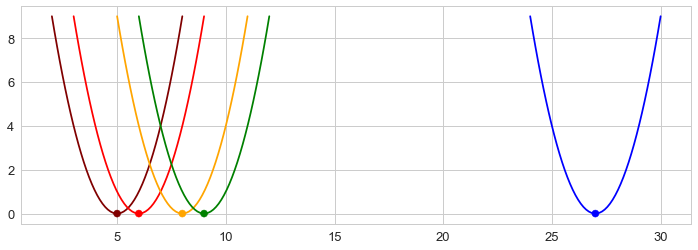

In [72]:
mse_of_point = lambda y_hat, p: (y_hat - p)**2

draw_errors(mse_of_point)

---

$$ MSE = \frac{1}{N}\sum_{i=1}^{N} (y_i - \alpha)^2 $$

$$ \alpha = ? $$

In [75]:
def draw_optimal_const(y, f):
    y_range = np.linspace(y.min() - 2, y.max() + 2, num=100)
    errors = [f(y, np.ones_like(y) * p) for p in y_range]
    i = np.argmin(errors)
    plt.subplots(1,1, figsize=(12, 4))
    plt.scatter(y, np.zeros_like(y), c=colors)
    plt.scatter(y_range[i], errors[i], c='k', label='Optimal constant')
    plt.plot(y_range, errors)
    plt.title('The best value is %.3f' % y_range[i])
    plt.legend()

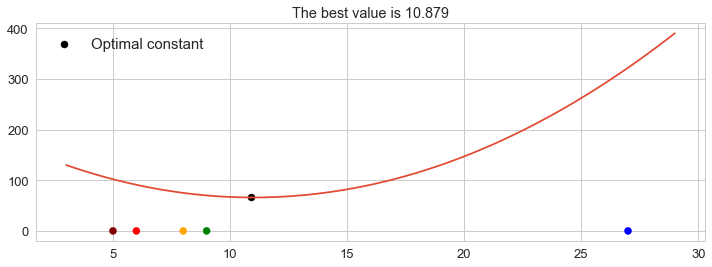

In [76]:
draw_optimal_const(y, mean_squared_error)

Лучшей константой является __среднее значение__ по таргету.

_P.s._ На самом деле, 11.

## RMSE

$$ RMSE = \frac{1}{N} \sqrt{ \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 } $$

Ведет себя абсолютно так же, как и MSE. Неудивительно, правда?

## $R^2$

$$ R^2 = 1 - \frac{ \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2  }{ \frac{1}{N} \sum_{i=1}^{N} (y_i - \bar{y}_i)^2 } = 1 - \frac{MSE}{\frac{1}{N} \sum_{i=1}^{N} (y_i - \bar{y}_i)^2} $$

$$ \bar{y} = \frac{1}{N} \sum_{i=1}^{N} y_i $$

Знаменатель в формуле $R^2$ не участвует в оптимизации, потому что все это время является константой. 

Из этого следует важный вывод: __оптимизируя MSE, вы добиваетесь лучшего $R^2$__, и наоборот.

## MAE

In [77]:
from sklearn.metrics import mean_absolute_error

$$ MAE = \frac{1}{N}\sum_{i=1}^{N} |y_i - \hat{y}_i| $$

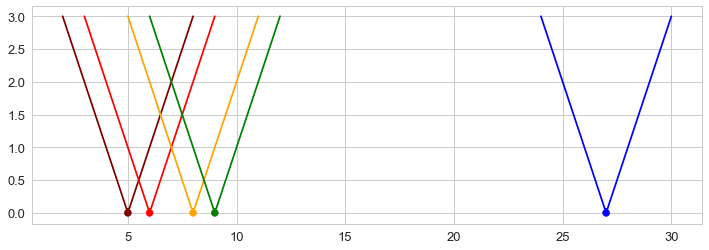

In [78]:
mae_of_point = lambda y_hat, p: np.abs(y_hat - p)

draw_errors(mae_of_point)

---

$$ MAE = \frac{1}{N}\sum_{i=1}^{N} |y_i - \alpha| $$

$$ \alpha = ? $$

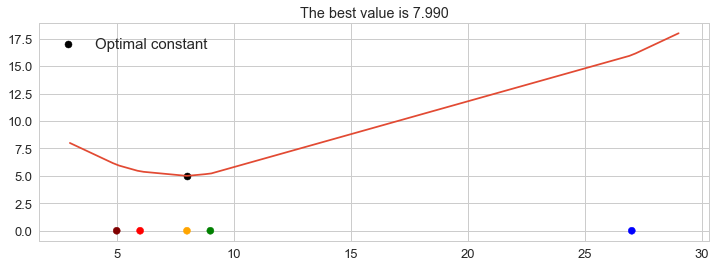

In [80]:
draw_optimal_const(y, mean_absolute_error)

Лучшим является __медиана__ таргета.

_P.s._ То есть на самом деле, 8.

### Минутка хороших практик

__У вас в данных есть выбросы?__ $\rightarrow$ Используй __MAE__!

__Уверен, что они выбросы?__ $\rightarrow$ Используй __MAE__!

__"Выбросы" - нормальные значения, которые могут появляться?__ $\rightarrow$ Используй __MSE__!

## MSPE

Рассмотрим пример:

    Для некоторого магазина мы предсказали 9 продаж, а было 10. MSE = 1.
    Для второго магазина мы предсказали 999 продаж, а было 1000. MSE = 1.

$$ MSPE = \frac{100\%}{N} \sum_{i=1}^N \Big( \frac{y_i - \hat{y}_i}{y_i} \Big)^2$$

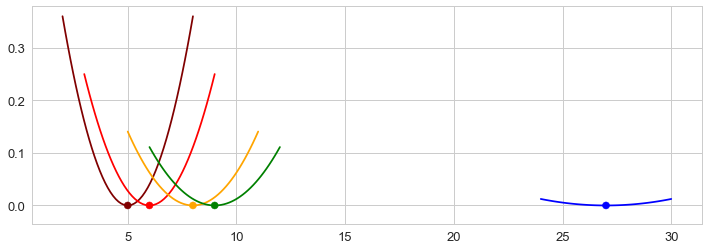

In [82]:
mspe_of_point = lambda y_hat, p: ((y_hat - p) / p)**2

draw_errors(mspe_of_point)

---

$$ MSPE = \frac{100\%}{N} \sum_{i=1}^N \Big( \frac{y_i - \alpha}{y_i} \Big)^2$$

$$\alpha=?$$

In [84]:
def mean_squared_percentage_error(y_true, y_pred):
    frac = (y_true - y_pred) / y_true
    s = np.sum(frac ** 2)
    return 100.0 / len(y_true) * s

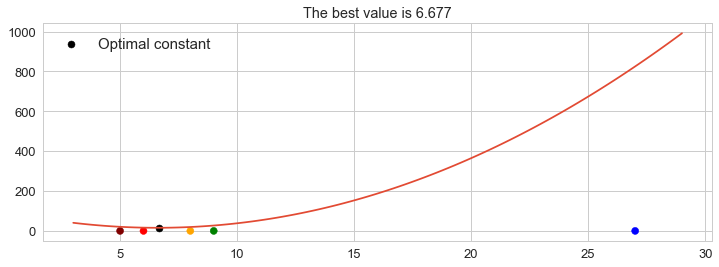

In [85]:
draw_optimal_const(y, mean_squared_percentage_error)

Правильный ответ __6.6__. Видим, что сдвинуто в сторону более мелких значений.

## MAPE

$$ MAPE = \frac{100\%}{N} \sum_{i=1}^N \Big| \frac{y_i - \hat{y}_i}{y_i} \Big| $$

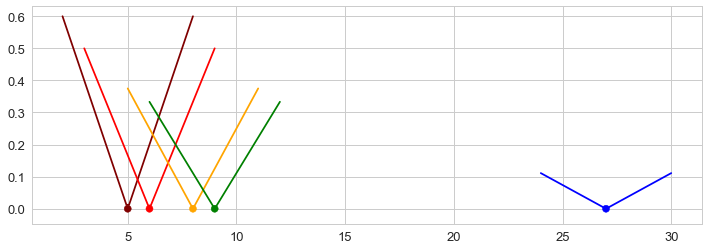

In [83]:
mape_of_point = lambda y_hat, p: np.abs((y_hat - p) / p)

draw_errors(mape_of_point)

---

$$ MAPE = \frac{100\%}{N} \sum_{i=1}^N \Big| \frac{y_i - \alpha}{y_i} \Big| $$

$$\alpha=?$$

In [86]:
def mean_absolute_percentage_error(y_true, y_pred):
    frac = (y_true - y_pred) / y_true
    s = np.sum(np.abs(frac))
    return 100.0 / len(y_true) * s

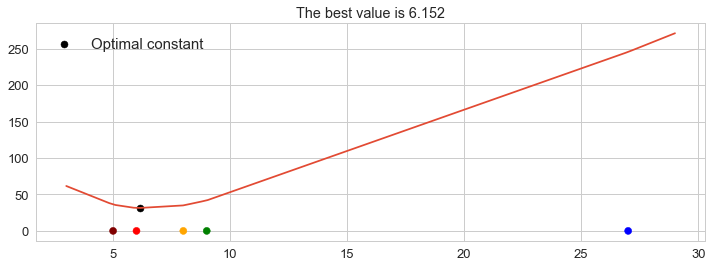

In [87]:
draw_optimal_const(y, mean_absolute_percentage_error)

На самом деле, __6__. Значение еще меньше, чем было у MAE.

## RMSLE

$$ RMSLE = \sqrt{ \frac{1}{N} \sum_{i=1}^N ( \log(y_i + 1) - \log(\hat{y}_i + 1) )^2 } = $$

$$ = RMSE ( \log(y_i + 1), \log(\hat{y}_i + 1) ) = $$

$$ = \sqrt{ MSE ( \log(y_i + 1), \log(\hat{y}_i + 1) ) } $$

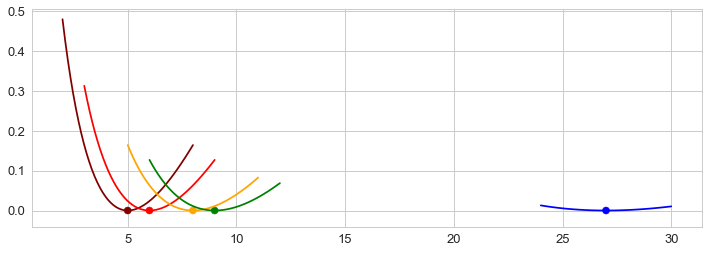

In [102]:
rmsle_of_point = lambda y_hat, p: (np.log(p+1) - np.log(y_hat+1))**2

draw_errors(rmsle_of_point)

---

$$ RMSLE = \sqrt{ \frac{1}{N} \sum_{i=1}^N ( \log(y_i + 1) - \log(\alpha + 1) )^2 } $$

$$\alpha=?$$

In [103]:
def root_mean_squared_logarithmic_error(y_true, y_pred):
    log_y_true = np.log(y_true + 1)
    log_y_pred = np.log(y_pred + 1)
    s = np.sum((log_y_true - log_y_pred)**2)
    return np.sqrt(1.0 / len(y_hat) * s)

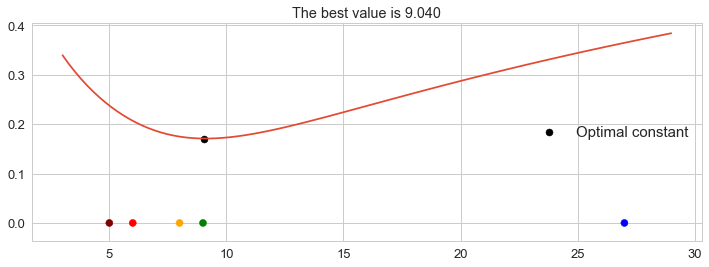

In [104]:
draw_optimal_const(y, root_mean_squared_logarithmic_error)

Правильный ответ: __9.1__.

И RMSLE хороша, так как, с одной стороны, работает с относительными ошибками, а, с другой, не смещена в сторону меньших значений таргета.